# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Import Dataset

In [2]:
# Load the datasets
data_path = "../data/processed/data.csv"

# Read the data and column descriptions
df = pd.read_csv(data_path,low_memory = False)

# Check Missing Values

In this step, we will be checking the missing percentages of each column

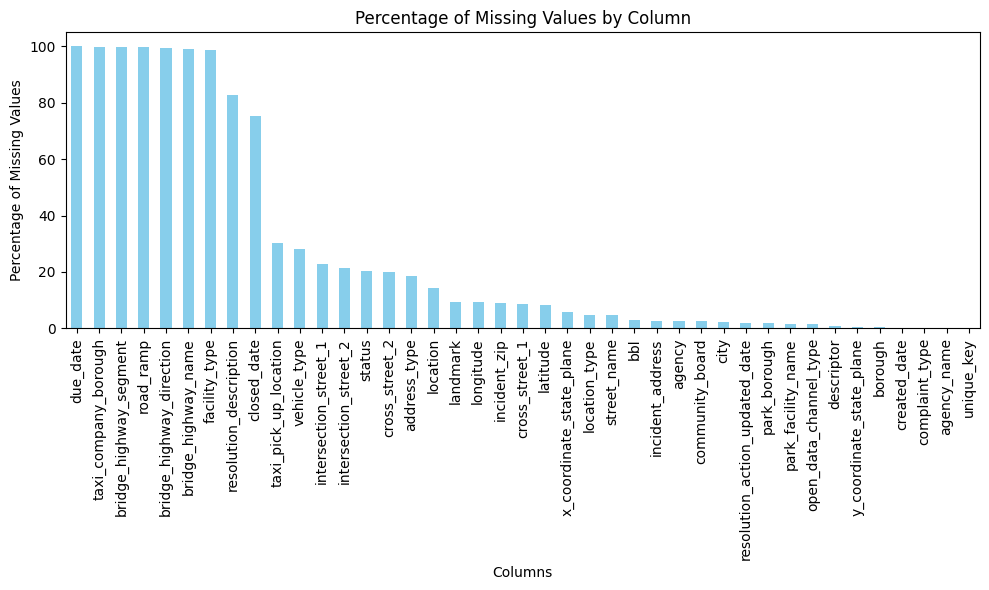

(         unique_key
 count  6.388000e+06
 mean   5.975092e+07
 std    1.978594e+06
 min    5.630232e+07
 25%    5.804182e+07
 50%    5.975503e+07
 75%    6.146049e+07
 max    6.316979e+07,
 {},
             unique_key
 unique_key         1.0)

In [3]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentages = (missing_values / len(df)) * 100

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyze numerical feature distributions
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_summary = df[numerical_columns].describe()

# Analyze categorical feature distributions
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = {col: df[col].value_counts() for col in categorical_columns if df[col].nunique() <= 10}

# Calculate correlations for numerical features
correlation_matrix = df[numerical_columns].corr()

numerical_summary, categorical_summary, correlation_matrix


As we can see, some columns have very high missing percentage and we can drop columns that have more than 80% missing values as these will not contribute to anything

In [4]:
# Drop columns with over 80% missing values using an advanced approach with thresholding
missing_threshold = 0.8
missing_percentages = df.isnull().mean()  # Calculate missing percentages
columns_to_drop_advanced = missing_percentages[missing_percentages > missing_threshold].index.tolist()

# Drop the identified columns
df = df.drop(columns=columns_to_drop_advanced)

# Verify the updated dataset structure
df_info = df.info()

df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6388000 entries, 0 to 6387999
Data columns (total 33 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   unique_key                      int64 
 1   created_date                    object
 2   agency                          object
 3   agency_name                     object
 4   complaint_type                  object
 5   descriptor                      object
 6   location_type                   object
 7   incident_zip                    object
 8   incident_address                object
 9   street_name                     object
 10  cross_street_1                  object
 11  cross_street_2                  object
 12  intersection_street_1           object
 13  intersection_street_2           object
 14  address_type                    object
 15  city                            object
 16  landmark                        object
 17  status                          object
 18  re

In [5]:
# Inspect the unique values and data types of each column
column_summary = pd.DataFrame({
    "Column": df.columns,
    "Data_Type": df.dtypes,
    "Unique_Values": df.nunique(),
    "Missing_Values": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

column_summary


,Column,Data_Type,Unique_Values,Missing_Values,Missing_Percentage
closed_date,closed_date,object,837918,4809535,75.290153
taxi_pick_up_location,taxi_pick_up_location,object,828869,1936720,30.318096
vehicle_type,vehicle_type,object,813512,1799281,28.166578
intersection_street_1,intersection_street_1,object,27736,1461593,22.880291
intersection_street_2,intersection_street_2,object,39431,1374601,21.518488
status,status,object,449922,1297608,20.313212
cross_street_2,cross_street_2,object,19790,1278204,20.009455
address_type,address_type,object,135590,1178977,18.456121
location,location,object,1033307,919565,14.395194
landmark,landmark,object,142123,606330,9.491703


# Data Cleaning

In this step, we will start cleaning the data column by column, we can start by closed_date column as its a very important column and it has 75% missing values

### closed_date column

In [6]:
# Clean the 'closed_date' column
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')

# Drop rows where 'closed_date' is missing
df = df.dropna(subset=['closed_date'])

# Verify the shape of the dataset after dropping rows with missing 'closed_date'
final_shape_after_closed_date = df.shape
print("Final dataset shape after handling 'closed_date':", final_shape_after_closed_date)

Final dataset shape after handling 'closed_date': (920653, 33)


# Longitude and latitude

In [7]:
# Inspect rows with missing latitude and longitude
missing_location_data = df[df['latitude'].isnull() | df['longitude'].isnull()]

# Check if other location-related columns are filled in these rows
location_related_columns = ['incident_zip', 'borough', 'city', 'community_board', 'location']
missing_location_summary = missing_location_data[location_related_columns].isnull().sum()

# Display rows where latitude or longitude is missing alongside location-related columns
missing_location_sample = missing_location_data[location_related_columns].head()

missing_location_summary, missing_location_sample


(incident_zip        4408
 borough              298
 city                8466
 community_board      183
 location           11561
 dtype: int64,
      incident_zip        borough           city        community_board  \
 205           NaN      MANHATTAN            NaN  Unspecified MANHATTAN   
 1137        10309  STATEN ISLAND  STATEN ISLAND       03 STATEN ISLAND   
 1243          NaN    Unspecified            NaN          0 Unspecified   
 1397        10309  STATEN ISLAND  STATEN ISLAND       03 STATEN ISLAND   
 1763        11234       BROOKLYN            NaN   Unspecified BROOKLYN   
 
      location  
 205       NaN  
 1137      NaN  
 1243      NaN  
 1397      NaN  
 1763      NaN  )

In [8]:
# Identify rows with non-numeric values in 'latitude' and 'longitude'
invalid_lat_lon = df[
    ~df['latitude'].apply(lambda x: isinstance(x, (int, float))) |
    ~df['longitude'].apply(lambda x: isinstance(x, (int, float)))
]

# Display the rows with invalid latitude and longitude values
invalid_lat_lon_sample = invalid_lat_lon[['latitude', 'longitude']].head()

# Clean the 'latitude' and 'longitude' columns by coercing to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Verify rows with invalid values after cleaning
remaining_invalid_lat_lon = df[
    df['latitude'].isnull() | df['longitude'].isnull()
]

# create the mapping for incident_zip
incident_zip_mapping = (
    df.groupby('incident_zip')[['latitude', 'longitude']]
    .mean()
    .dropna()
    .to_dict(orient='index')
)

invalid_lat_lon_sample, remaining_invalid_lat_lon.shape[0], incident_zip_mapping


(              latitude           longitude
 51  40.585979462313674  -73.96051556847777
 52   40.71542986402135   -73.9916058433748
 58   40.78580269394736  -73.97461396948108
 59   40.85257109020581  -73.91326105651915
 61  40.686464154148595  -73.83676175300474,
 19318,
 {'00083': {'latitude': 40.77431233527818, 'longitude': -73.97083095971752},
  '1 ELK STREET': {'latitude': 983033.0, 'longitude': 199442.0},
  '1 WEST FORDHAM ROAD': {'latitude': 1011562.0, 'longitude': 253628.0},
  '100-05 ATLANTIC AVENUE': {'latitude': 1027517.0, 'longitude': 190534.0},
  '1000 5 AVENUE': {'latitude': 994623.0, 'longitude': 222956.0},
  '10000': {'latitude': 38.928086558351644, 'longitude': -73.96785198070968},
  '10001': {'latitude': 40.01469618773307, 'longitude': -73.99493433002422},
  '10002': {'latitude': 39.52464598045592, 'longitude': -73.98855731777704},
  '10003': {'latitude': 39.97024886834279, 'longitude': -73.98862224527812},
  '10004': {'latitude': 39.91849355278226, 'longitude': -74.0

In [9]:
# Convert incident_zip_mapping to a DataFrame
mapping_df = pd.DataFrame.from_dict(incident_zip_mapping, orient='index').reset_index()
mapping_df.columns = ['incident_zip', 'mapped_latitude', 'mapped_longitude']

# Merge the mapping with the original dataset
df = df.merge(mapping_df, on='incident_zip', how='left')

# Fill missing latitude and longitude using the mapped values
df['latitude'] = df['latitude'].fillna(df['mapped_latitude'])
df['longitude'] = df['longitude'].fillna(df['mapped_longitude'])

# Drop the temporary mapping columns
df = df.drop(['mapped_latitude', 'mapped_longitude'], axis=1)

# Verify results
remaining_missing_lat_lon = df[df['latitude'].isnull() | df['longitude'].isnull()].shape[0]

In [10]:
remaining_missing_lat_lon

4525

In [11]:
# Drop rows where latitude or longitude is still missing
df = df.dropna(subset=['latitude', 'longitude'])

In [12]:
df.shape

(916128, 33)

In [13]:
# Inspect the unique values and data types of each column
column_summary = pd.DataFrame({
    "Column": df.columns,
    "Missing_Values": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

column_summary

,Column,Missing_Values,Missing_Percentage
taxi_pick_up_location,taxi_pick_up_location,899269,98.159755
vehicle_type,vehicle_type,865870,94.514085
landmark,landmark,321273,35.068571
intersection_street_2,intersection_street_2,260939,28.482810
intersection_street_1,intersection_street_1,260429,28.427141
cross_street_1,cross_street_1,218267,23.824946
cross_street_2,cross_street_2,217700,23.763055
location_type,location_type,104811,11.440650
bbl,bbl,91142,9.948610
city,city,39990,4.365111


# descriptor, location_type, and city

In [14]:
# Focus on `descriptor`, `location_type`, and `city` for inspection
categorical_columns = ['descriptor', 'location_type', 'city']
categorical_summary = {col: df[col].value_counts() for col in categorical_columns}
missing_categorical = df[categorical_columns].isnull().sum()

# Display basic statistics and missing values
categorical_summary, missing_categorical


({'descriptor': descriptor
  Loud Music/Party                 155758
  Blocked Hydrant                   36528
  Posted Parking Sign Violation     35229
  Banging/Pounding                  34835
  No Access                         34601
                                    ...  
  Broken Fence                          1
  Hangers                               1
  Broken or Defective                   1
  Noise: Vehicle (NR2)                  1
  Food Contaminated                     1
  Name: count, Length: 776, dtype: int64,
  'location_type': location_type
  Street/Sidewalk               313720
  RESIDENTIAL BUILDING          159499
  Residential Building/House    138870
  Street                         73218
  Sidewalk                       46336
                                 ...  
  10022                              1
  Street Fair Vendor                 1
  Groomer                            1
  10017                              1
  Tattoo Parlor                      1
  Name:

In [15]:
# Group by complaint_type and location_type for descriptor
descriptor_grouped_df = (
    df.groupby(['complaint_type', 'location_type'])['descriptor']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
    .reset_index()
    .rename(columns={'descriptor': 'imputed_descriptor'})
)

# Merge descriptor grouped data with the original dataset
df = df.merge(
    descriptor_grouped_df,
    on=['complaint_type', 'location_type'],
    how='left'
)

In [16]:
# Fill missing descriptor values
df['descriptor'] = df['descriptor'].fillna(df['imputed_descriptor'])
df.drop(columns=['imputed_descriptor'], inplace=True)

In [17]:
# Group by complaint_type and descriptor for location_type
location_type_grouped_df = (
    df.groupby(['complaint_type', 'descriptor'])['location_type']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
    .reset_index()
    .rename(columns={'location_type': 'imputed_location_type'})
)

# Merge location_type grouped data with the original dataset
df = df.merge(
    location_type_grouped_df,
    on=['complaint_type', 'descriptor'],
    how='left'
)

# Fill missing location_type values
df['location_type'] = df['location_type'].fillna(df['imputed_location_type'])
df.drop(columns=['imputed_location_type'], inplace=True)

# Verify results
missing_descriptor_after = df['descriptor'].isnull().sum()
missing_location_type_after = df['location_type'].isnull().sum()

missing_descriptor_after, missing_location_type_after

(12, 12)

In [18]:
df = df.dropna(subset=['descriptor', 'location_type'])

In [19]:
# Inspect unique values in the city column
unique_cities = df['city'].value_counts()

unique_cities


city
BROOKLYN                                                                                                                                                                                                                                                                                                                                                                                                                                                                        263832
BRONX                                                                                                                                                                                                                                                                                                                                                                                                                                                                           200141
NEW YORK                                             

In [20]:
# Step 1: Load the city column data
# Assuming `df` DataFrame is already loaded with columns ["city", "Count"]

# Step 2: Replace NaN with an empty string for safety
df['city'] = df['city'].fillna("").astype(str)

df['city'] = df['city'].str.upper().str.strip()

# Step 3: Replace explicitly invalid entries
# Explicit invalid entries
invalid_entries = [
    "ADDRESS", "INTERSECTION", "BLOCKFACE", "UNRECOGNIZED",
    "CLOSED", "ONLINE", "IN PROGRESS", "MOBILE", "PHONE", ""
]
df['city'] = df['city'].replace(invalid_entries, "UNKNOWN")

# Step 4: Replace invalid patterns
invalid_patterns = [
    r"^\d{4}-\d{2}-\d{2}T.*$",  # Full timestamps
    r"^\d{2}:\d{2}:\d{2}\.\d{3}$",  # Time-only formats
    r"^THE .*",  # Text responses starting with "THE"
    r"^\d{2} .*"  # Entries like "12 MANHATTAN"
]
df['city'] = df['city'].replace(invalid_patterns, "UNKNOWN", regex=True)

# Step 5: Clean formatted entries like "12 MANHATTAN" by removing the numerical prefix
df['city'] = df['city'].str.replace(r"^\d{2} ", "", regex=True)

# Step 6: Standardize case and trim whitespace again (if needed)
df['city'] = df['city'].str.upper().str.strip()


In [20]:
# Drop the 'City' column
df.drop(columns=['city'], inplace=True)

# Verify the column has been dropped
print(df.head())

   unique_key             created_date agency  \
0    63168812  2024-11-22T00:54:15.000   NYPD   
1    63159720  2024-11-22T00:53:45.000   NYPD   
2    63168943  2024-11-22T00:50:07.000   NYPD   
3    63161918  2024-11-22T00:49:54.000   NYPD   
4    63166424  2024-11-22T00:48:46.000   NYPD   

                       agency_name           complaint_type  \
0  New York City Police Department          Illegal Parking   
1  New York City Police Department       Noise - Commercial   
2  New York City Police Department  Noise - Street/Sidewalk   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Noise - Vehicle   

                     descriptor     location_type incident_zip  \
0  Commercial Overnight Parking   Street/Sidewalk        11235   
1              Loud Music/Party  Store/Commercial        10002   
2              Loud Music/Party   Street/Sidewalk        10024   
3   Parking Permit Improper Use   Street/Sidewalk        10453

In [21]:
# Inspect the unique values and data types of each column
column_summary = pd.DataFrame({
    "Column": df.columns,
    "Missing_Values": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

column_summary

,Column,Missing_Values,Missing_Percentage
taxi_pick_up_location,taxi_pick_up_location,899261,98.160167
vehicle_type,vehicle_type,865862,94.514450
landmark,landmark,321270,35.068703
intersection_street_2,intersection_street_2,260933,28.482528
intersection_street_1,intersection_street_1,260422,28.426749
cross_street_1,cross_street_1,218260,23.824494
cross_street_2,cross_street_2,217694,23.762711
bbl,bbl,91139,9.948413
street_name,street_name,23096,2.521078
incident_address,incident_address,22824,2.491388


# Incident_address, street_name and landmark

In [22]:
# Fill missing incident_address values using street_name where available
df['incident_address'] = df['incident_address'].fillna(df['street_name'])

# Drop the street_name column as per instructions
df.drop(columns=['street_name'], inplace=True)

# Drop rows with missing incident_address
df = df.dropna(subset=['incident_address'])

# Verify the results
remaining_missing_incident_address = df['incident_address'].isnull().sum()
final_shape_after_address_cleanup = df.shape

remaining_missing_incident_address, final_shape_after_address_cleanup


(0, (893292, 31))

In [23]:
# Replace missing values in 'landmark' with "Not Applicable"
df['landmark'] = df['landmark'].fillna("Not Applicable")

# Verify the result
missing_landmark_after = df['landmark'].isnull().sum()

In [24]:
missing_landmark_after

0

In [25]:
# Inspect the unique values and data types of each column
column_summary = pd.DataFrame({
    "Column": df.columns,
    "Missing_Values": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

column_summary

,Column,Missing_Values,Missing_Percentage
taxi_pick_up_location,taxi_pick_up_location,876815,98.155474
vehicle_type,vehicle_type,843177,94.389852
intersection_street_2,intersection_street_2,258359,28.922122
intersection_street_1,intersection_street_1,257874,28.867828
cross_street_1,cross_street_1,195450,21.879744
cross_street_2,cross_street_2,194923,21.820748
bbl,bbl,68695,7.690095
y_coordinate_state_plane,y_coordinate_state_plane,7442,0.833098
x_coordinate_state_plane,x_coordinate_state_plane,7318,0.819217
location,location,7252,0.811829


# resolution_action_update_date, icnident_zip and bbl

In [26]:
df['resolution_action_updated_date'].value_counts()

resolution_action_updated_date
2024-11-14T00:00:00.000    3893
2024-11-04T00:00:00.000    3718
2024-11-13T00:00:00.000    3706
2024-11-18T00:00:00.000    3706
2024-10-16T00:00:00.000    3589
                           ... 
2024-10-14T00:10:42.000       1
2024-10-14T06:55:14.000       1
2024-10-14T02:35:13.000       1
2024-10-14T14:49:10.000       1
2024-09-29T12:57:33.000       1
Name: count, Length: 582075, dtype: int64

In [27]:
df = df.dropna(subset=["resolution_action_updated_date"])
df = df.dropna(subset=["incident_zip"])

In [28]:
# Investigate unique values in the 'bbl' column
unique_bbl_values = df['bbl'].unique()

# Display the unique values and their types
print(unique_bbl_values)
print(type(unique_bbl_values[0]))

['3072440050' '1002980005' '1012150001' ... 'Unspecified QUEENS'
 '83 QUEENS' '4036200011']
<class 'str'>


In [29]:
# Convert 'bbl' to numeric, coercing invalid values to NaN
df['bbl'] = pd.to_numeric(df['bbl'], errors='coerce')

# Check the unique values and missing counts after cleaning
unique_bbl_cleaned = df['bbl'].unique()
missing_bbl_after_cleaning = df['bbl'].isnull().sum()

unique_bbl_cleaned, missing_bbl_after_cleaning

(array([3.07244005e+09, 1.00298000e+09, 1.01215000e+09, ...,
        1.01511012e+09, 3.01234003e+09, 4.03620001e+09]),
 79770)

In [30]:
# Compute the most frequent 'bbl' for each 'incident_zip'
bbl_mode_by_zip = (
    df.groupby('incident_zip')['bbl']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .to_dict()
)

# Impute missing 'bbl' using vectorized mapping
df['bbl'] = df['bbl'].fillna(df['incident_zip'].map(bbl_mode_by_zip))

# Check remaining missing values in 'bbl'
remaining_missing_bbl = df['bbl'].isnull().sum()

print("Remaining missing 'bbl':", remaining_missing_bbl)

Remaining missing 'bbl': 893


In [31]:
# Drop rows with missing 'bbl'
df = df.dropna(subset=['bbl'])

# Verify the final shape of the dataset
final_shape_after_bbl = df.shape
print("Final dataset shape after handling 'bbl':", final_shape_after_bbl)

Final dataset shape after handling 'bbl': (892298, 31)


### taxi_pick_up_location and vehicle_type.

In [32]:
# Drop columns with extremely high missing values
columns_to_drop = ['taxi_pick_up_location', 'vehicle_type']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the shape of the dataset after dropping these columns
final_shape_after_dropping_high_missing = df.shape
print("Dataset shape after dropping high missing columns:", final_shape_after_dropping_high_missing)

Dataset shape after dropping high missing columns: (892298, 29)


### intersection_street_1, intersection_street_2, cross_street_1, cross_street_2

In [33]:
# Drop redundant location-related columns
columns_to_drop = ['intersection_street_1', 'intersection_street_2', 'cross_street_1', 'cross_street_2']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the shape of the dataset after dropping these columns
final_shape_after_dropping_location = df.shape
print("Dataset shape after dropping location-related columns:", final_shape_after_dropping_location)

Dataset shape after dropping location-related columns: (892298, 25)


### address_type, status and borough

In [34]:
# Impute missing values for 'address_type' and 'status' with 'Unknown'
df['address_type'] = df['address_type'].fillna('Unknown')
df['status'] = df['status'].fillna('Unknown')

In [35]:
# Drop rows with missing 'borough'
df = df.dropna(subset=['borough'])

In [36]:
# Verify the shape of the dataset after these operations
final_shape_after_categorical_handling = df.shape
print("Dataset shape after handling categorical columns:", final_shape_after_categorical_handling)

Dataset shape after handling categorical columns: (892099, 25)


### park_borough, park_facility_name, open_data_channel_typ, community_board, 

In [37]:
# Fill missing values with "Unknown"
df['park_borough'] = df['park_borough'].fillna('Unknown')
df['park_facility_name'] = df['park_facility_name'].fillna('Unknown')
df['open_data_channel_type'] = df['open_data_channel_type'].fillna('Unknown')

# Drop rows with missing 'community_board'
df = df.dropna(subset=['community_board'])

# Verify the updated dataset shape
final_shape_after_categorical_handling = df.shape
print("Dataset shape after handling selected columns:", final_shape_after_categorical_handling)

Dataset shape after handling selected columns: (891416, 25)


### x_coordinate_state_plane and y_coordinate_state_plane

In [38]:
# Explore unique values and summary statistics
x_coord_summary = df['x_coordinate_state_plane'].describe()
y_coord_summary = df['y_coordinate_state_plane'].describe()

# Check unique values (sample)
x_coord_unique = df['x_coordinate_state_plane'].unique()[:10]
y_coord_unique = df['y_coordinate_state_plane'].unique()[:10]

print("Summary for x_coordinate_state_plane:\n", x_coord_summary)
print("Summary for y_coordinate_state_plane:\n", y_coord_summary)
print("Sample unique values for x_coordinate_state_plane:", x_coord_unique)
print("Sample unique values for y_coordinate_state_plane:", y_coord_unique)

Summary for x_coordinate_state_plane:
 count      884323
unique      91999
top       1022911
freq        29921
Name: x_coordinate_state_plane, dtype: object
Summary for y_coordinate_state_plane:
 count     884326
unique    102362
top       264242
freq       29914
Name: y_coordinate_state_plane, dtype: object
Sample unique values for x_coordinate_state_plane: ['995217' '986577' '991280' '1008246' '1029522' '981045' '986651'
 '1025673' '996710' '1021658']
Sample unique values for y_coordinate_state_plane: ['152767' '199927' '225567' '249904' '189416' '174581' '149516' '238378'
 '201213' '191876']


In [39]:
# Drop the state plane coordinate columns
columns_to_drop = ['x_coordinate_state_plane', 'y_coordinate_state_plane']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the updated dataset shape
final_shape_after_dropping_coordinates = df.shape
print("Dataset shape after dropping coordinate columns:", final_shape_after_dropping_coordinates)

Dataset shape after dropping coordinate columns: (891416, 23)


### agency and location

In [40]:
# Drop the 'agency' and 'location' columns
columns_to_drop = ['agency', 'location']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the updated dataset shape
final_shape_after_dropping_redundant = df.shape
print("Dataset shape after dropping redundant columns:", final_shape_after_dropping_redundant)

Dataset shape after dropping redundant columns: (891416, 21)


In [41]:
# Inspect the unique values and data types of each column
column_summary = pd.DataFrame({
    "Column": df.columns,
    "Missing_Values": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum() / len(df)) * 100
}).sort_values(by="Missing_Percentage", ascending=False)

column_summary

,Column,Missing_Values,Missing_Percentage
unique_key,unique_key,0,0.0
resolution_action_updated_date,resolution_action_updated_date,0,0.0
longitude,longitude,0,0.0
latitude,latitude,0,0.0
park_borough,park_borough,0,0.0
park_facility_name,park_facility_name,0,0.0
open_data_channel_type,open_data_channel_type,0,0.0
borough,borough,0,0.0
bbl,bbl,0,0.0
community_board,community_board,0,0.0


In [42]:
df.shape

(891416, 21)

# Feature Engineering

In this step, we will be creating new features to improve the dataset

### Response time column

In [43]:
# Ensure date columns are in datetime format
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])

# Calculate response_time in hours
df['response_time'] = (df['closed_date'] - df['created_date']).dt.total_seconds() / 3600

# Verify the new column
print(df[['response_time']].head())

   response_time
0       0.176389
1       0.239444
2       0.226944
3       0.197222
4       0.598333


In [44]:
df.shape

(891416, 22)

### Extracting date features from date columns

In [45]:
# Extract date features from 'created_date' and 'closed_date'
df['created_hour'] = df['created_date'].dt.hour
df['created_day'] = df['created_date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['created_month'] = df['created_date'].dt.month
df['closed_hour'] = df['closed_date'].dt.hour
df['response_weekday'] = (df['created_day'] < 5).astype(int)  # 1=Weekday, 0=Weekend

# Verify the new features
print(df[['created_hour', 'created_day', 'created_month', 'closed_hour', 'response_weekday']].head())

   created_hour  created_day  created_month  closed_hour  response_weekday
0             0            4             11            1                 1
1             0            4             11            1                 1
2             0            4             11            1                 1
3             0            4             11            1                 1
4             0            4             11            1                 1


In [46]:
df.shape

(891416, 27)

### Creating Borough complaint type and hour weekday interaction

In [47]:
# Create interaction features
df['borough_complaint_type'] = df['borough'] + "_" + df['complaint_type']
df['hour_weekday_interaction'] = df['created_hour'].astype(str) + "_" + df['response_weekday'].astype(str)

# Verify the new features
print(df[['borough_complaint_type', 'hour_weekday_interaction']].head())

              borough_complaint_type hour_weekday_interaction
0           BROOKLYN_Illegal Parking                      0_1
1       MANHATTAN_Noise - Commercial                      0_1
2  MANHATTAN_Noise - Street/Sidewalk                      0_1
3              BRONX_Illegal Parking                      0_1
4             QUEENS_Noise - Vehicle                      0_1


In [48]:
# Clean the 'resolution_action_updated_date' column
df['resolution_action_updated_date'] = pd.to_datetime(
    df['resolution_action_updated_date'], errors='coerce'
)

# Count valid and invalid entries
valid_resolutions = df['resolution_action_updated_date'].notnull().sum()
invalid_resolutions = df['resolution_action_updated_date'].isnull().sum()

print(f"Valid entries: {valid_resolutions}, Invalid entries: {invalid_resolutions}")

# Create 'time_to_update' feature
df['time_to_update'] = (
    df['resolution_action_updated_date'] - df['created_date']
).dt.total_seconds() / 3600

Valid entries: 882099, Invalid entries: 9317


In [49]:
# Drop 'resolution_action_updated_date' after feature creation
df.drop(columns=['resolution_action_updated_date'], inplace=True)

df['time_to_update'].fillna('Not Applicable', inplace=True)

# Verify the new feature
print(df[['created_date', 'time_to_update']].head())

         created_date time_to_update
0 2024-11-22 00:54:15       0.177222
1 2024-11-22 00:53:45       0.241111
2 2024-11-22 00:50:07       0.228056
3 2024-11-22 00:49:54       0.198056
4 2024-11-22 00:48:46       0.599167


In [50]:
# Check the number of unique values for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values_counts = df[categorical_columns].nunique()

print(unique_values_counts)

agency_name                     15
complaint_type                 161
descriptor                     718
location_type                  147
incident_zip                   233
incident_address            251807
address_type                     6
landmark                      7334
status                          12
community_board               6772
borough                       6574
open_data_channel_type         664
park_facility_name             754
park_borough                  4477
borough_complaint_type        8636
hour_weekday_interaction        48
time_to_update              260545
dtype: int64


In [51]:
# Label Encoding for low-cardinality columns
label_columns = ['agency_name', 'address_type', 'status', 'location_type', 'park_borough', 'complaint_type', 'descriptor']
label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-hot Encoding for 'hour_weekday_interaction'
df = pd.get_dummies(df, columns=['hour_weekday_interaction'], drop_first=True)

# Frequency Encoding for high-cardinality columns
# Create a function for frequency encoding
def frequency_encoding(df, col):
    freq_map = df[col].value_counts() / len(df)
    return df[col].map(freq_map)

# Apply frequency encoding for high-cardinality columns
freq_columns = ['incident_zip', 'landmark', 'community_board', 'borough', 'open_data_channel_type', 'park_facility_name', 'borough_complaint_type']
for col in freq_columns:
    df[col] = frequency_encoding(df, col)

# Verify the changes
print(df.head())

   unique_key        created_date  agency_name  complaint_type  descriptor  \
0    63168812 2024-11-22 00:54:15           12              68         126   
1    63159720 2024-11-22 00:53:45           12              92         360   
2    63168943 2024-11-22 00:50:07           12              97         360   
3    63161918 2024-11-22 00:49:54           12              68         455   
4    63166424 2024-11-22 00:48:46           12              98          94   

   location_type  incident_zip          incident_address  address_type  \
0            133      0.008816  2892 CONEY ISLAND AVENUE             0   
1            127      0.008598         22 ORCHARD STREET             0   
2            133      0.004580      145 WEST   84 STREET             0   
3            133      0.011738    1880 UNIVERSITY AVENUE             0   
4            133      0.002814         101-60 106 STREET             0   

   landmark  ...  hour_weekday_interaction_5_0  hour_weekday_interaction_5_1  \
0  0.0

In [52]:
from sklearn.preprocessing import StandardScaler

# Drop high cardinality columns like 'incident_address'
df.drop(columns=['incident_address'], inplace=True)

# Frequency Encoding for high-cardinality columns
high_cardinality_columns = ['landmark', 'community_board', 'open_data_channel_type', 'park_facility_name', 'borough_complaint_type']
for col in high_cardinality_columns:
    df[col] = frequency_encoding(df, col)

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['latitude', 'longitude', 'response_time']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [53]:
df.shape

(891416, 74)

In [54]:
df_copy = df

### Modeling

First I'm going to train a RandomForestRegressor

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Replace 'Not Applicable' with 0 in the 'time_to_update' column
df['time_to_update'] = df['time_to_update'].replace('Not Applicable', 0)

# Convert 'time_to_update' column back to float type
df['time_to_update'] = df['time_to_update'].astype(float)

# Step 1: Train-test split (80-20 split, stratified if necessary)
X = df.drop(columns=['response_time', 'unique_key', 'created_date', 'closed_date'])
y = df['response_time']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model with optimized parameters
model = RandomForestRegressor(
    n_estimators=50,        # Reduce the number of trees
    max_depth=10,           # Limit tree depth to speed up training
    max_samples=0.5,        # Use 50% of the data for each tree
    max_features="sqrt",    # Use sqrt(number of features) for splitting
    n_jobs=-1,              # Use all available cores for parallelism
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

MAE: 0.17, RMSE: 0.45, R²: 0.79


We can see the model did not produce very good outcome, we can do better

In [60]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost MAE: 0.04, RMSE: 0.30, R²: 0.90


The XGBRegressor produces far better results. Let's check for overfitting

In [61]:
# Evaluate the model on both the training set and the test set
y_train_pred = xgb_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")

Training MAE: 0.03, RMSE: 0.16, R²: 0.97


In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation and get the R² score
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

# Display mean and std of cross-validation scores
print(f"Cross-Validation Mean R²: {cv_scores.mean():.2f}, Std: {cv_scores.std():.2f}")

Cross-Validation Mean R²: 0.91, Std: 0.12


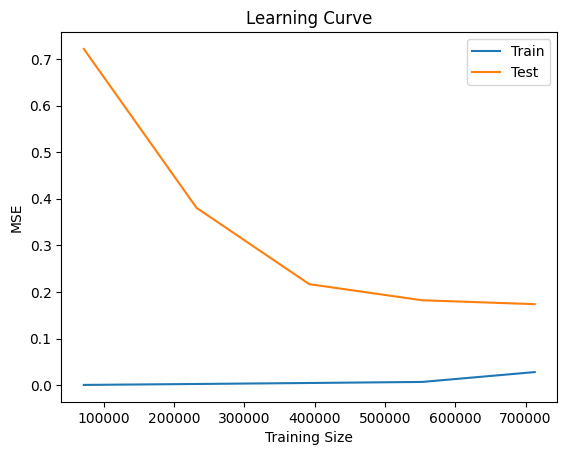

In [63]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Plot learning curves
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Test")
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.show()

We can see there is a slight overfitting so one way to fix this is to penalize the model and apply regularization techniques

### Regularization

In [64]:
# Apply L2 (reg_lambda) and L1 (alpha) regularization to XGBoost
xgb_model_reg = xgb.XGBRegressor(
    n_estimators=100,
    random_state=42,
    reg_lambda=1,  # L2 regularization (correct parameter name)
    alpha=0.5,  # L1 regularization
    n_jobs=-1
)

# Train the model with regularization
xgb_model_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reg = xgb_model_reg.predict(X_test)

# Evaluate the model
mae_reg = mean_absolute_error(y_test, y_pred_reg)
rmse_reg = mean_squared_error(y_test, y_pred_reg, squared=False)
r2_reg = r2_score(y_test, y_pred_reg)

print(f"Regularized XGBoost MAE: {mae_reg:.2f}, RMSE: {rmse_reg:.2f}, R²: {r2_reg:.2f}")

Regularized XGBoost MAE: 0.04, RMSE: 0.30, R²: 0.91


### Hyperparameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 0.5, 1, 1.5],
    'alpha': [0, 0.5, 1]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,       # Cross-validation folds
    verbose=2,  # Output progress
    n_jobs=-1,  # Use all cores for parallel processing
    random_state=42
)

# Perform the Randomized Search
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
# Print the best parameters found
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the performance
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0, 'alpha': 0}
Best Model MAE: 0.03, RMSE: 0.29, R²: 0.91


In [66]:
best_params

{'subsample': 0.8,
 'reg_lambda': 0,
 'n_estimators': 150,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0,
 'alpha': 0}

now we can use the parameters that we found to train the model again

In [67]:
# Use the best parameters found from RandomizedSearchCV
best_params = {
    'subsample': best_params['subsample'],
    'reg_lambda': best_params['reg_lambda'],
    'n_estimators': best_params['n_estimators'],
    'min_child_weight': best_params['min_child_weight'],
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'colsample_bytree': best_params['colsample_bytree'],
    'alpha': best_params['alpha']
}

# Initialize the XGBoost model with the best parameters
best_model = xgb.XGBRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.2f}")

Best Model MAE: 0.03, RMSE: 0.29, R²: 0.91


### Feature Importance

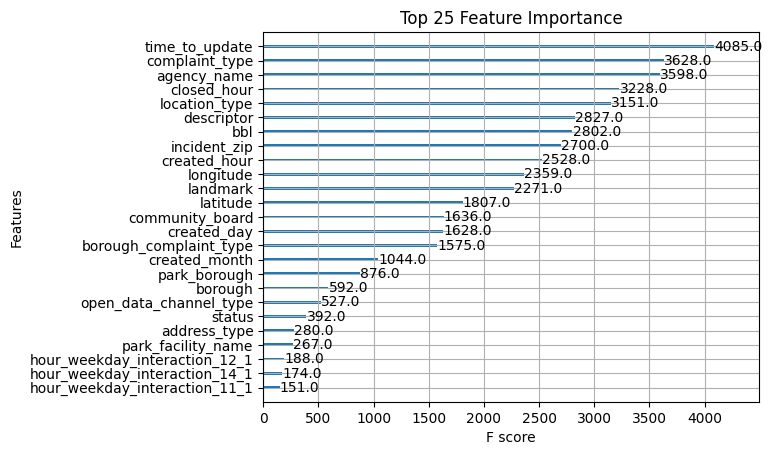

In [68]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance for the best model
xgb.plot_importance(best_model, importance_type='weight', max_num_features=25)
plt.title('Top 25 Feature Importance')
plt.show()

In [69]:
# List of features to drop based on feature importance
features_to_drop = [
    'hour_weekday_interaction_0_1', 'hour_weekday_interaction_10_0', 'hour_weekday_interaction_10_1',
    'hour_weekday_interaction_11_0', 'hour_weekday_interaction_11_1', 'hour_weekday_interaction_12_0',
    'hour_weekday_interaction_12_1', 'hour_weekday_interaction_13_0', 'hour_weekday_interaction_13_1',
    'hour_weekday_interaction_14_0', 'hour_weekday_interaction_14_1', 'hour_weekday_interaction_15_0',
    'hour_weekday_interaction_15_1', 'hour_weekday_interaction_16_0', 'hour_weekday_interaction_16_1',
    'hour_weekday_interaction_17_0', 'hour_weekday_interaction_17_1', 'hour_weekday_interaction_18_0',
    'hour_weekday_interaction_18_1', 'hour_weekday_interaction_19_0', 'hour_weekday_interaction_19_1',
    'hour_weekday_interaction_1_0', 'hour_weekday_interaction_1_1', 'hour_weekday_interaction_20_0',
    'hour_weekday_interaction_20_1', 'hour_weekday_interaction_21_0', 'hour_weekday_interaction_21_1',
    'hour_weekday_interaction_22_0', 'hour_weekday_interaction_22_1', 'hour_weekday_interaction_23_0',
    'hour_weekday_interaction_23_1', 'address_type', 'community_board', 'status', 'open_data_channel_type'
]

# Drop the less important features
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Check the new feature set
print(f"Reduced feature set shape: {X_train_reduced.shape}")

Reduced feature set shape: (713132, 35)


In [70]:
# Initialize the XGBoost model with the best parameters found earlier
best_model = xgb.XGBRegressor(
    subsample=best_params['subsample'],
    reg_lambda=best_params['reg_lambda'],
    n_estimators=best_params['n_estimators'],
    min_child_weight=best_params['min_child_weight'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    colsample_bytree=best_params['colsample_bytree'],
    alpha=best_params['alpha'],
    random_state=42,
    n_jobs=-1
)

# Train the model with the reduced feature set
best_model.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test_reduced)

# Evaluate the model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

# Output the evaluation results
print(f"Best Model (with reduced features) MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.2f}")

Best Model (with reduced features) MAE: 0.03, RMSE: 0.29, R²: 0.91
